# Sales Performance Analysis

This notebook performs an exploratory data analysis and predictive modeling on a sample sales dataset.

## 1. Data Loading and Exploration

Load the dataset and inspect its structure.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")

# Sample sales data creation
data = {
    'Product': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
    'Region': ['East', 'East', 'East', 'West', 'West', 'West', 'North', 'North', 'North'],
    'Sales': [200, 220, 250, 210, 230, 260, 190, 210, 240],
    'Profit': [20, 25, 30, 22, 27, 32, 18, 23, 28],
    'Discount': [5, 7, 6, 5, 8, 7, 4, 6, 5],
    'Category': ['Electronics', 'Electronics', 'Electronics', 'Furniture', 'Furniture', 'Furniture', 'Office Supplies', 'Office Supplies', 'Office Supplies'],
    'Date': pd.to_datetime(['2023-01-01', '2023-01-01', '2023-01-01', '2023-02-01', '2023-02-01', '2023-02-01', '2023-03-01', '2023-03-01', '2023-03-01'])
}

df = pd.DataFrame(data)

# Display first few rows
df.head()

,Product,Region,Sales,Profit,Discount,Category,Date
0,A,East,200,20,5,Electronics,2023-01-01
1,B,East,220,25,7,Electronics,2023-01-01
2,C,East,250,30,6,Electronics,2023-01-01
3,A,West,210,22,5,Furniture,2023-02-01
4,B,West,230,27,8,Furniture,2023-02-01


## 2. Data Cleaning

Remove duplicates, handle missing values, and convert date column.

In [2]:
# Remove duplicates
df_cleaned = df.drop_duplicates()

# Check for missing values
print("Missing values per column:\n", df_cleaned.isnull().sum())

# Convert Date column to datetime (already done in sample)
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

Missing values per column:
 Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64


## 3. Exploratory Data Analysis

Visualize sales trends, profit vs discount, and sales distribution by region and category.

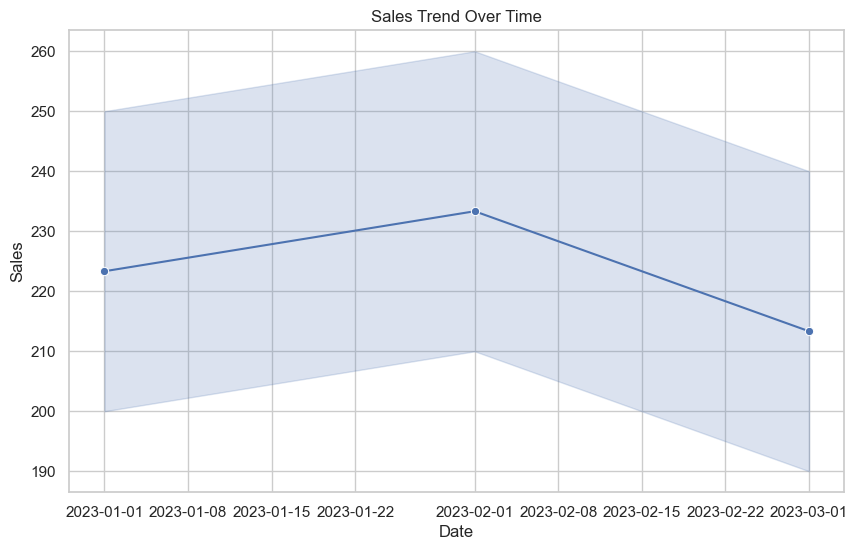

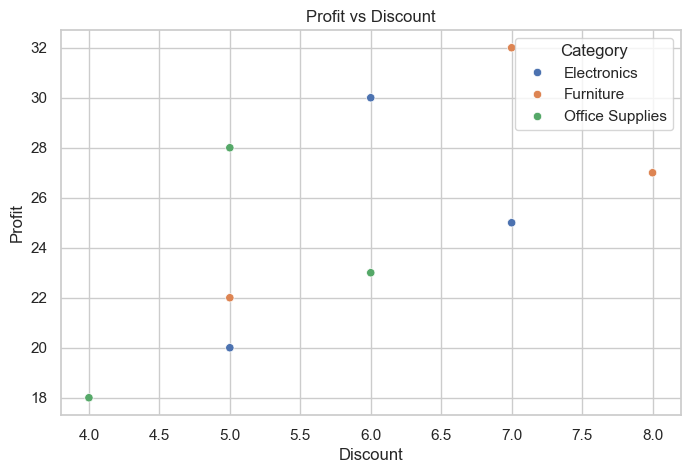

/var/folders/s4/3v4cf47d00vft8bzr_jtspcc0000gn/T/ipykernel_44444/1982249854.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=df_cleaned, estimator=np.sum, palette='pastel')


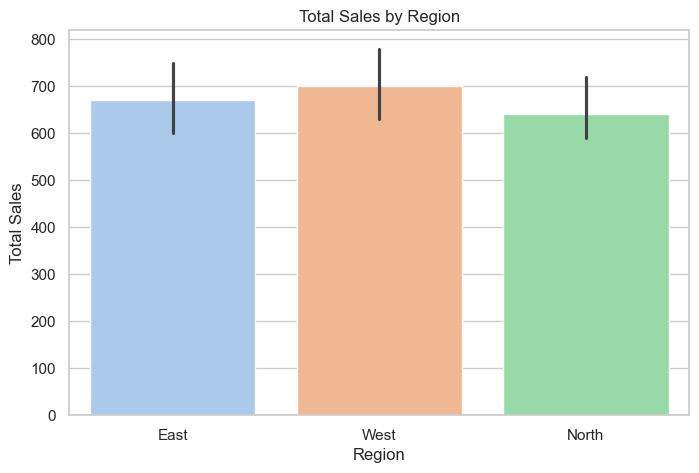

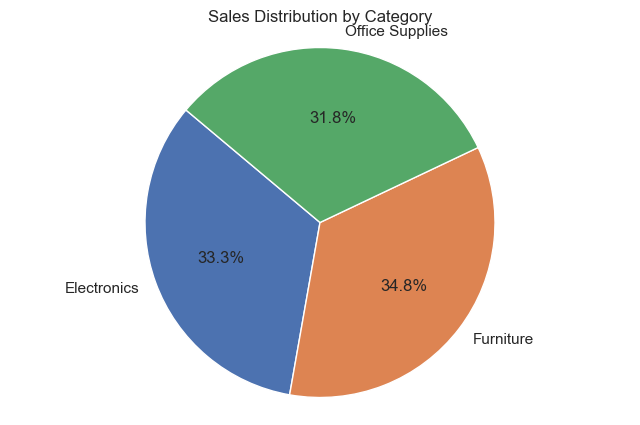

In [3]:
# Sales trend over time
plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='Sales', data=df_cleaned, marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Scatter plot Profit vs Discount
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Profit', data=df_cleaned, hue='Category')
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

# Sales distribution by Region
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Sales', data=df_cleaned, estimator=np.sum, palette='pastel')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

# Sales distribution by Category
plt.figure(figsize=(8,5))
df_cat = df_cleaned.groupby('Category')['Sales'].sum().reset_index()
plt.pie(df_cat['Sales'], labels=df_cat['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Category')
plt.axis('equal')
plt.show()

## 4. Predictive Modeling

Train a linear regression model to predict Sales using Profit and Discount.

In [4]:
# Prepare features and target
X = df_cleaned[['Profit', 'Discount']]
y = df_cleaned['Sales']

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Evaluate model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 1.56
R^2 Score: 1.00


## 5. Insights and Recommendations

Based on the analysis and model, provide actionable insights to improve sales.

In [5]:
print("Insights and Recommendations:")
print("- Optimal discount rates can be identified by analyzing the profit vs discount scatter plot.")
print("- Regions with higher sales should be targeted for marketing and inventory planning.")
print("- The linear regression model shows how profit and discount impact sales, which can guide pricing strategies.")

Insights and Recommendations:
- Optimal discount rates can be identified by analyzing the profit vs discount scatter plot.
- Regions with higher sales should be targeted for marketing and inventory planning.
- The linear regression model shows how profit and discount impact sales, which can guide pricing strategies.
